In [7]:
# 各种库导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import warnings
import GEOparse
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression, RidgeClassifier, Ridge, Lasso, LassoCV, LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
import sys
warnings.filterwarnings('ignore')

In [70]:
downloaded_gpls = [96,6947,6244,6102,571,570,2507,10558]
feature =  ['HERC6', 'BTN3A3', 'EVL', 'S100A12', 'CR1', 'METTL9']
weight = [15, 24, 4, -1, -25, -4]

In [ ]:
downloaded_gpls = [96,6947,6244,6102,571,570,2507,10558]
feature =  ['ARG1', 'CD177', 'VNN1', 'IFIT1', 'TRDV3', 'SIGLEC1', 'LY6E']
weight = [1,4,5,-1,-1,-4,-4]
symble_cols = ['Gene Symbol','ILMN_Gene','Symbol']

GPL96
    HERC6  BTN3A3   EVL  S100A12   CR1  METTL9    target
95  474.6   403.9  12.7    672.1  21.4    24.4  bacteria
96  362.4   301.9   7.0    774.7  14.9   100.9  bacteria


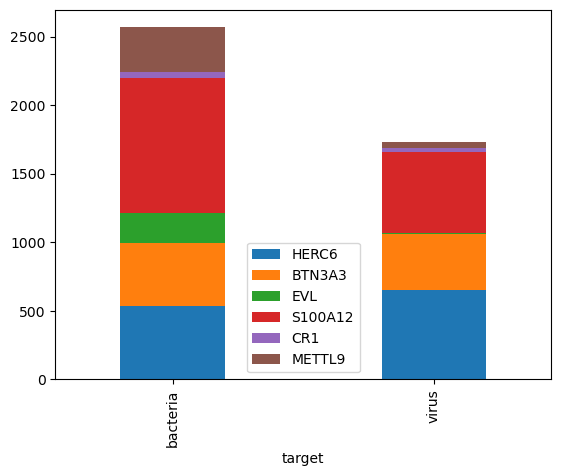

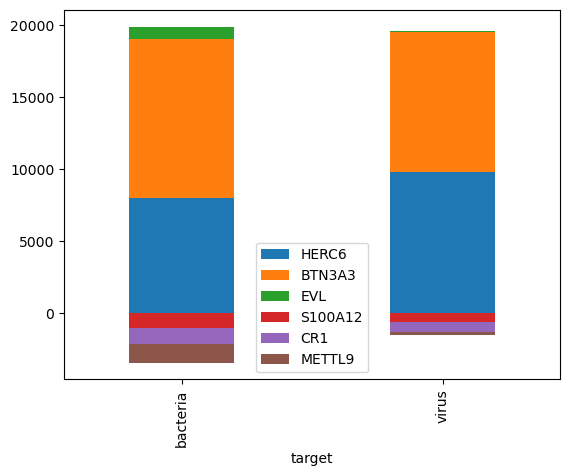

GPL6947
        HERC6    BTN3A3       EVL    S100A12        CR1    METTL9 target
361  12.30103  27.14490 -7.746134  12.831500  28.549330  7.148648  virus
362  10.59743  47.41447 -3.304505  -1.109157   8.623073  7.726315  virus


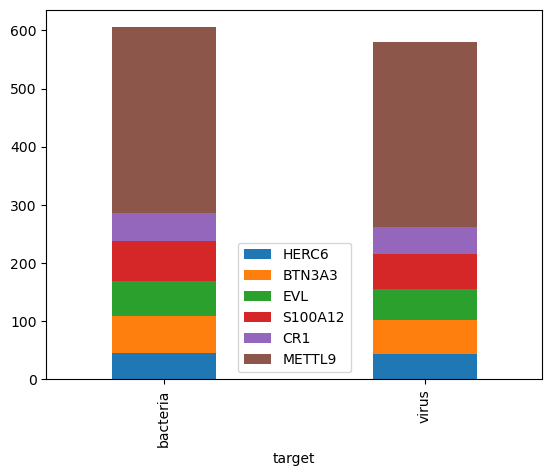

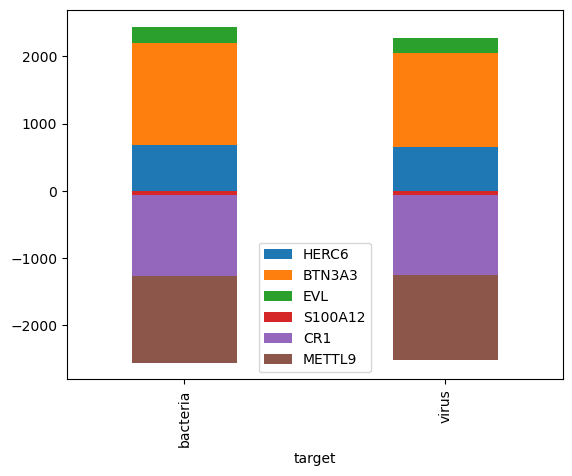

GPL6244 error
GPL6102
       HERC6    BTN3A3       EVL   S100A12       CR1    METTL9 target
38  113.3188  113.3582  113.3330  124.2791  711.1767  146.2060  virus
39  112.9755  103.7827  113.8094  159.4575  748.4220  130.7466  virus
GPL6102 error
GPL571
          HERC6       BTN3A3         EVL       S100A12         CR1  \
278   92.489829  1376.327498  523.744239  16673.865467  768.476531   
279  104.373124  2326.191199  524.779055   4138.706147   70.066244   

          METTL9    target  
278  5914.211694  bacteria  
279  1793.190902      None  


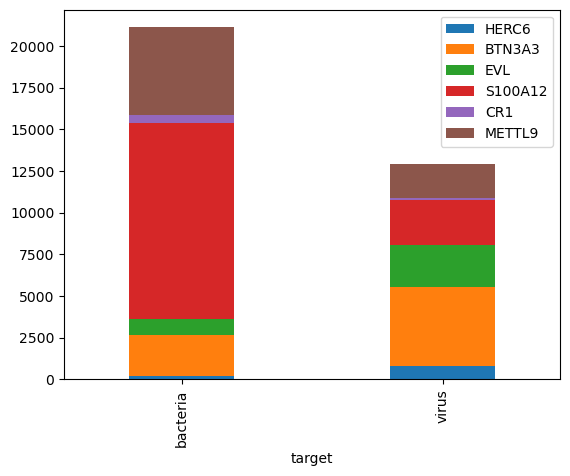

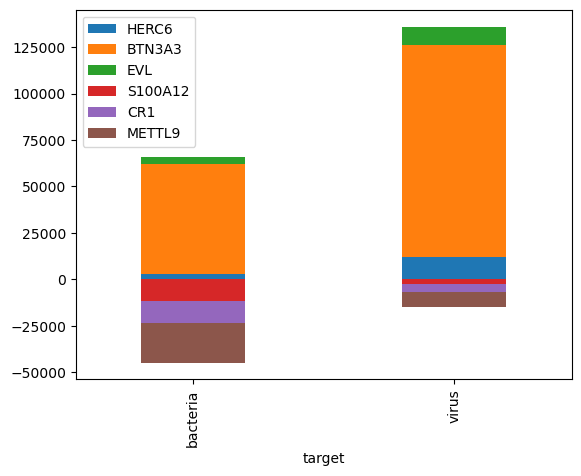

GPL570
        HERC6       BTN3A3         EVL      S100A12       CR1      METTL9  \
168  6.082397  1264.192109  593.761607   625.527717  31.02351  757.929579   
169  4.973943  1040.527948  561.682093  1641.614883  27.05175  778.660159   

    target  
168   none  
169   none  


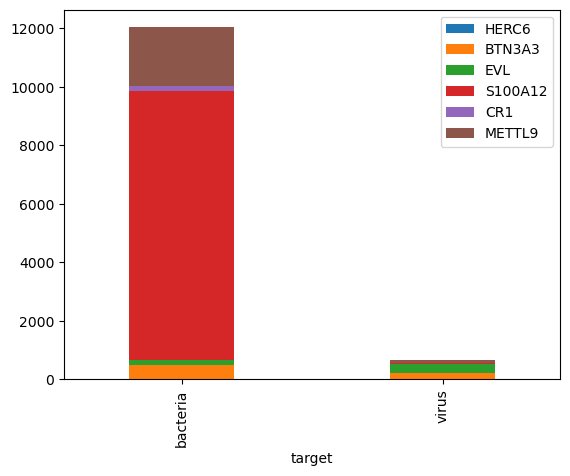

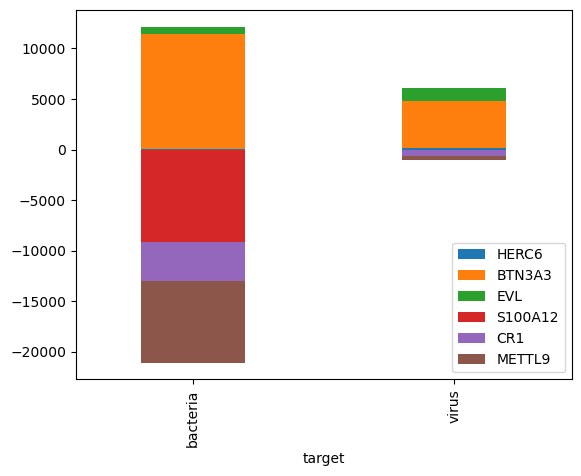

GPL2507 error
GPL10558
           HERC6  BTN3A3        EVL  S100A12         CR1       METTL9 target
1460  126.168091     NaN  71.856366      NaN  740.147640  1080.224605  other
1461  107.242464     NaN  53.975052      NaN  945.640549  1645.606931  other


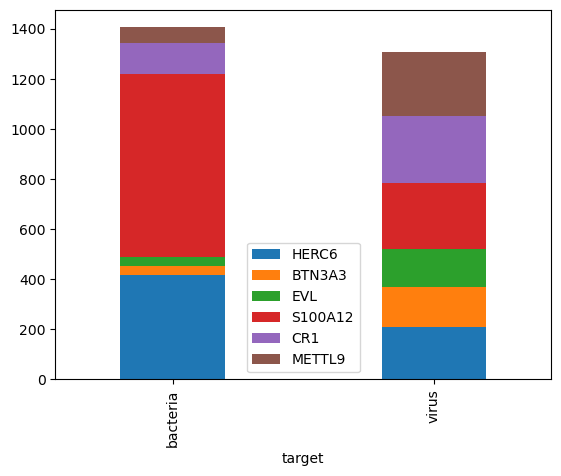

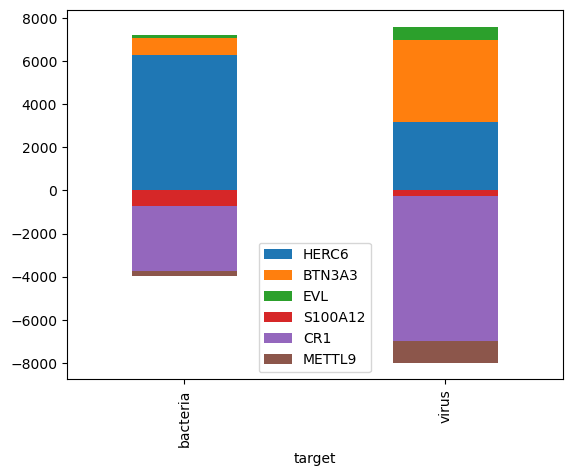

In [71]:
for gplid in downloaded_gpls:
    GPLNAME = 'GPL' + str(gplid)
    datatable =  pd.read_csv('./datasets/' + GPLNAME + '_save.csv')
    gpl = GEOparse.get_GEO(geo=GPLNAME, destdir="./datasets", silent=True)
    ID = []
    for col in symble_cols:
        if col in gpl.table.columns:
            symble_col = col
            break
    try:
        for i in range(len(feature)):
            found_id = False
            selected_id = []
            for j in range(len(gpl.table[gpl.table[col] == feature[i]]['GB_ACC'])):
                if gpl.table[gpl.table[col] == feature[i]]['GB_ACC'].values[j] in datatable.columns:
                    selected_id += [gpl.table[gpl.table[col] == feature[i]]['GB_ACC'].values[j]]
                    found_id = True
                    break
            if found_id == False:
                print("can't find the ID of " + feature[i] + " in " + GPLNAME)
            else:
                if len(selected_id) > 1:
                    print("more than one possible ID of " + feature[i] + " in " + GPLNAME)
                    # select the row with the least number of NaN
                    nans = []
                    for j in range(len(selected_id)):
                        nans += [datatable[selected_id[j]].isna().sum()]
                    print(nans)
                    print(selected_id)
                    selected_id = [selected_id[nans.index(min(nans))]]
                ID += selected_id
        select_rows = ID + ['infection']
        testdata = datatable[select_rows]
        # 把testdata的columns的名字改成feature
        testdata.columns = feature + ["target"]
        print('GPL' + str(gplid))
        print(testdata.tail(2))
        testdata_mean = testdata.groupby("target").mean()
        testdata_mean_weight = testdata_mean * weight
        data1=testdata_mean.loc[['bacteria','virus']]
        data2=testdata_mean_weight.loc[['bacteria','virus']]
        data1.plot.bar(stacked=True,width=0.4)
        data2.plot.bar(stacked=True,width=0.4,bottom=0)
        plt.title('')
        plt.show()
    except KeyError:
        print('GPL' + str(gplid) + ' error')
        continue
        # 计算每一种基因在不同感染情况下的表达量的平均值
    except ValueError:
        print('GPL' + str(gplid) + ' error')
        continue
    